In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from functools import reduce
from sklearn import preprocessing
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor


In [8]:
import pickle

_____________________________________________________________________________________________________________________________________________________________________

In [18]:
df = pd.read_csv('C:/Users/rfg2m/Documents/DATA_SCIENCE/Entregas/Proyectos/MACHINE LEARNING/Predicci-n_Ventas_Helados/Jupyter Notebook/Limpieza/archivoHeladosFinal.csv')
df.head()

,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento,Ventas,Año,Mes,Fin_de_semana_o_festivo,Estación_Año,Interacción_temp_humedad
0,2021-02-01,11.3,0.00,73.0,132.0,3.2,76.55,2021,2,0,0,824.9
1,2021-02-03,10.0,0.00,88.0,49.0,1.4,46.88,2021,2,0,0,880.0
2,2021-02-04,10.7,0.00,85.0,75.0,1.5,100.06,2021,2,0,0,909.5
3,2021-02-05,11.7,0.13,75.0,124.0,1.6,377.79,2021,2,0,0,877.5
4,2021-02-06,8.7,0.05,91.0,60.0,1.4,292.16,2021,2,1,0,791.7


In [19]:
df['Año'] = pd.to_datetime(df['Año'], errors='coerce')
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Fecha                     1246 non-null   datetime64[ns]
 1   Temperatura_Media         1246 non-null   float64       
 2   Precipitaciones           1222 non-null   float64       
 3   Humedad_Relativa          1244 non-null   float64       
 4   Radiación_Solar           1246 non-null   float64       
 5   Velocidad_Viento          1246 non-null   float64       
 6   Ventas                    1246 non-null   float64       
 7   Año                       1246 non-null   datetime64[ns]
 8   Mes                       1246 non-null   int64         
 9   Fin_de_semana_o_festivo   1246 non-null   int64         
 10  Estación_Año              1246 non-null   int64         
 11  Interacción_temp_humedad  1244 non-null   float64       
dtypes: datetime64[ns](2)

In [21]:
df['Precipitaciones'] = df['Precipitaciones'].fillna(df['Precipitaciones'].mean())

In [22]:
df['Humedad_Relativa'] = df['Humedad_Relativa'].fillna(df['Humedad_Relativa'].mean())

In [23]:
df['Interacción_temp_humedad'] = df['Interacción_temp_humedad'].fillna(df['Interacción_temp_humedad'].mean())

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Fecha                     1246 non-null   datetime64[ns]
 1   Temperatura_Media         1246 non-null   float64       
 2   Precipitaciones           1246 non-null   float64       
 3   Humedad_Relativa          1246 non-null   float64       
 4   Radiación_Solar           1246 non-null   float64       
 5   Velocidad_Viento          1246 non-null   float64       
 6   Ventas                    1246 non-null   float64       
 7   Año                       1246 non-null   datetime64[ns]
 8   Mes                       1246 non-null   int64         
 9   Fin_de_semana_o_festivo   1246 non-null   int64         
 10  Estación_Año              1246 non-null   int64         
 11  Interacción_temp_humedad  1246 non-null   float64       
dtypes: datetime64[ns](2)

In [25]:
# Obtener los años únicos en el DataFrame
df['Año'].unique()


<DatetimeArray>
['1970-01-01 00:00:00.000002021', '1970-01-01 00:00:00.000002022',
 '1970-01-01 00:00:00.000002023', '1970-01-01 00:00:00.000002024']
Length: 4, dtype: datetime64[ns]

In [26]:
sorted(df['Año'].unique())


[Timestamp('1970-01-01 00:00:00.000002021'),
 Timestamp('1970-01-01 00:00:00.000002022'),
 Timestamp('1970-01-01 00:00:00.000002023'),
 Timestamp('1970-01-01 00:00:00.000002024')]

In [27]:
df.head()

,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento,Ventas,Año,Mes,Fin_de_semana_o_festivo,Estación_Año,Interacción_temp_humedad
0,2021-02-01,11.3,0.00,73.0,132.0,3.2,76.55,1970-01-01 00:00:00.000002021,2,0,0,824.9
1,2021-02-03,10.0,0.00,88.0,49.0,1.4,46.88,1970-01-01 00:00:00.000002021,2,0,0,880.0
2,2021-02-04,10.7,0.00,85.0,75.0,1.5,100.06,1970-01-01 00:00:00.000002021,2,0,0,909.5
3,2021-02-05,11.7,0.13,75.0,124.0,1.6,377.79,1970-01-01 00:00:00.000002021,2,0,0,877.5
4,2021-02-06,8.7,0.05,91.0,60.0,1.4,292.16,1970-01-01 00:00:00.000002021,2,1,0,791.7


In [28]:
df.tail()

,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento,Ventas,Año,Mes,Fin_de_semana_o_festivo,Estación_Año,Interacción_temp_humedad
1241,2024-12-24,6.4,0.0,71.0,94.0,0.2,321.40,1970-01-01 00:00:00.000002024,12,0,0,454.4
1242,2024-12-27,6.8,0.0,82.0,69.0,0.1,184.40,1970-01-01 00:00:00.000002024,12,0,0,557.6
1243,2024-12-28,5.3,0.0,80.0,98.0,0.2,170.78,1970-01-01 00:00:00.000002024,12,1,0,424.0
1244,2024-12-29,4.4,0.0,79.0,100.0,0.2,248.40,1970-01-01 00:00:00.000002024,12,1,0,347.6
1245,2024-12-31,4.0,0.0,77.0,98.0,0.2,312.08,1970-01-01 00:00:00.000002024,12,0,0,308.0


In [29]:
print(df['Año'].unique())

<DatetimeArray>
['1970-01-01 00:00:00.000002021', '1970-01-01 00:00:00.000002022',
 '1970-01-01 00:00:00.000002023', '1970-01-01 00:00:00.000002024']
Length: 4, dtype: datetime64[ns]


__________________________________________________________________________________________________________________________________________

#### Modelo Machine Learning No Supervisado. Aplicación de Clustering (K-Means)

In [30]:
columnas_predictoras = ['Temperatura_Media', 'Estación_Año', 'Humedad_Relativa', 
                        'Fin_de_semana_o_festivo', 'Radiación_Solar']
X = df[columnas_predictoras]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
from sklearn.cluster import KMeans
#Definir y ajustar el modelo K-means 
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [32]:
#Agregar los clusters al DataFrame
df['cluster'] = clusters

In [33]:
#Ver la distribución de clusters
print(df.groupby('cluster').mean())

                                Fecha  Temperatura_Media  Precipitaciones  \
cluster                                                                     
0       2022-12-14 09:42:46.057441024          22.132202         0.009411   
1       2022-12-21 10:26:47.142856960          11.431393         0.049427   
2       2023-01-26 01:30:00.000000000          10.801786         0.044881   
3       2022-12-23 05:16:38.952879616          21.611211         0.011353   

         Humedad_Relativa  Radiación_Solar  Velocidad_Viento      Ventas  \
cluster                                                                    
0               42.306845       294.170507          1.610398  498.906397   
1               72.643017       122.686207          1.314250  191.918304   
2               72.830357       121.187500          1.238361  357.227589   
3               43.507050       292.836950          1.582943  853.289791   

                                  Año       Mes  Fin_de_semana_o_festivo  \
clus

Text(0.5, 1.0, 'Clusters de días según condiciones climáticas')

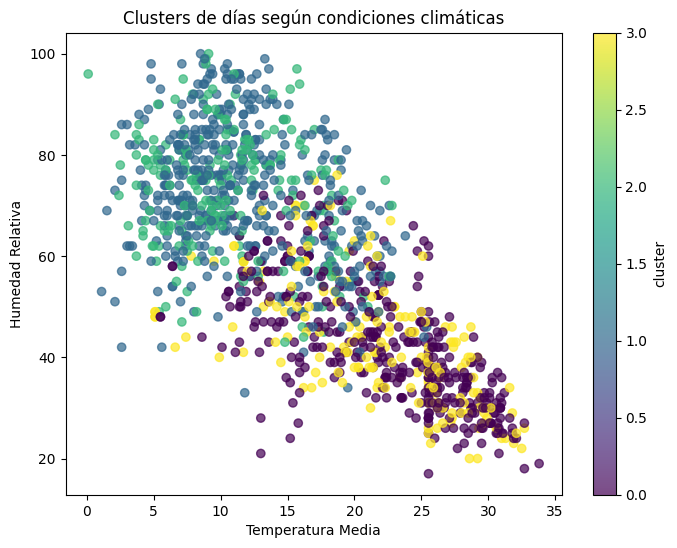

In [34]:
# Visualizar la distribución de clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Temperatura_Media'], df['Humedad_Relativa'], c=df['cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label="cluster")
plt.xlabel('Temperatura Media')
plt.ylabel('Humedad Relativa')
plt.title('Clusters de días según condiciones climáticas')

In [35]:
print(f'Inertia (WCSS): {kmeans.inertia_}')

Inertia (WCSS): 2028.7466802281697


Text(0.5, 1.0, 'Método del Codo para seleccionar k')

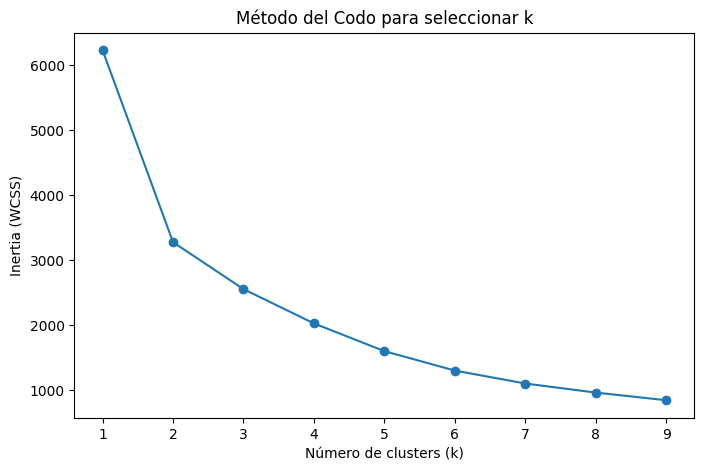

In [36]:

inertias = []
K_range = range(1, 10)  # Prueba con diferentes valores de k

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Graficar la curva de Elbow
plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker='o', linestyle='-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Método del Codo para seleccionar k')


##### El codo es el punto donde la disminución de inercia se vuelve menos pronunciada. En este gráfico parece estar en k=2 o k=3.
##### Si elijo k=2, se obtienen clusters diferenciados sin sobreajustar.
##### Si elijo k=3, se obtiene una segmentación más fina, pero con menor diferencia entre clusters.

In [37]:
from sklearn.metrics import silhouette_score
#Calcular el coeficiente de Silhouette
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
sil_score = silhouette_score(X_scaled, df['cluster'])

print(f'Coeficiente de Silhouette para k=2: {sil_score:.4f}')

Coeficiente de Silhouette para k=2: 0.3805


##### El coeficiente de Silhouette para k=2 indica que los clusters están moderadamente bien separados pero no son óptimos.

In [38]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
sil_score = silhouette_score(X_scaled, df['Cluster'])

print(f'Coeficiente de Silhouette para k=3: {sil_score:.4f}')

Coeficiente de Silhouette para k=3: 0.3805


In [39]:
# Guardar modelo
with open("kmeans.pkl", "wb") as f:
    pickle.dump(kmeans, f)

# Guardar scaler
with open("scaler_kmeans.pkl", "wb") as f:
    pickle.dump(scaler, f)

_________________________________________________________________________________________________________________________________________

### Modelos Supervisados

In [40]:
from sklearn.preprocessing import RobustScaler

In [41]:

columnas_predictoras = ['Temperatura_Media', 'Estación_Año', 'Humedad_Relativa', 
                        'Fin_de_semana_o_festivo', 'Radiación_Solar']

X = df[columnas_predictoras]
y = df['Ventas']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(996, 5)
(250, 5)
(996,)
(250,)


In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
#Escalado Robusto
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Usamos transformación logarítmica para reducir influencia de valores atípicos. El modelo se enfoque  en patrones generales y no en los valores extremos.
y_train_log = np.log1p(y_train)

_____________________________________________________________________________________________________________________________________________________________________________

### Modelo de Regresión Lineal

#### Opción Regresión Lineal con transformación log

In [47]:
modelo_a = LinearRegression()

In [48]:
#Entreno el modelo con la variable target transformada
modelo_a.fit(X_train_scaled, y_train_log)

LinearRegression()

In [49]:
#Predicción a escala log y luego la transformación inversa
y_pred_a = np.expm1(modelo_a.predict(X_test_scaled))


In [50]:
print(y_train)
print(y_train_log)

390      392.64
254      108.29
1054     239.25
1029     651.80
309       24.90
         ...   
1044     458.05
1095     872.05
1130     576.25
860     1001.15
1126     362.50
Name: Ventas, Length: 996, dtype: float64
390     5.975437
254     4.694005
1054    5.481680
1029    6.481271
309     3.254243
          ...   
1044    6.129159
1095    6.771993
1130    6.358275
860     6.909903
1126    5.895779
Name: Ventas, Length: 996, dtype: float64


In [51]:
mae_modelo_a = mean_absolute_error(y_test, y_pred_a)
rmse_modelo_a = np.sqrt(mean_squared_error(y_test, y_pred_a))
r2_modelo_a = r2_score(y_test, y_pred_a)


print(f"MAE: {mae_modelo_a:.4f}")
print(f"RMSE: {rmse_modelo_a:.4f}")
print(f"R²: {r2_modelo_a:.4f}")

MAE: 133.5999
RMSE: 213.1205
R²: 0.3518


In [52]:
# Guardar modelo
with open("modelo_a.pkl", "wb") as f:
    pickle.dump(modelo_a, f)

# Guardar scaler
with open("scaler_modelo_a.pkl", "wb") as f:
    pickle.dump(scaler, f)

#### Opción HuberRegressor (Regresión robusta)

In [53]:

from sklearn.linear_model import HuberRegressor

modelo_huber = HuberRegressor()
modelo_huber.fit(X_train_scaled, y_train)  #trabajar en escala original
y_pred_huber = modelo_huber.predict(X_test_scaled)


In [54]:
mae_modelo_huber = mean_absolute_error(y_test, y_pred_huber)
rmse_modelo_huber = np.sqrt(mean_squared_error(y_test, y_pred_huber))
r2_modelo_huber = r2_score(y_test, y_pred_huber)


print(f"MAE: {mae_modelo_huber:.4f}")
print(f"RMSE: {rmse_modelo_huber:.4f}")
print(f"R²: {r2_modelo_huber:.4f}")

MAE: 122.8230
RMSE: 167.3505
R²: 0.6003


In [55]:
# Guardar modelo
with open("modelo_huber.pkl", "wb") as f:
    pickle.dump(modelo_huber, f)

# Guardar scaler
with open("scaler_modelo_huber.pkl", "wb") as f:
    pickle.dump(scaler, f)

______________________________________________________________________________________________________________________________________________________________________

#### Modelo Gradient Boosting

In [56]:
modelo_6 = GradientBoostingRegressor()

param_grid_modelo_6 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7] 
}

grid_search_modelo_6 = GridSearchCV(modelo_6, param_grid_modelo_6, cv=5, scoring='r2', n_jobs=-1, verbose=1)

grid_search_modelo_6.fit(X_train_scaled, y_train_log)
    

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=1)

In [57]:
print('Mejores parámetros:', grid_search_modelo_6.best_params_)

Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [58]:
mejor_modelo_6 = grid_search_modelo_6.best_estimator_

In [59]:
y_pred_6_log = mejor_modelo_6.predict(X_test_scaled)
y_pred_6 = np.expm1(y_pred_6_log)


In [60]:
from sklearn.metrics import r2_score

r2_mejor_modelo_6 = r2_score(y_test, y_pred_6)
mae_mejor_modelo_6 = mean_absolute_error(y_test, y_pred_6)
rmse_mejor_modelo_6 = np.sqrt(mean_squared_error(y_test, y_pred_6))

In [61]:

print(f"MAE: {mae_mejor_modelo_6:.4f}")
print(f"RMSE: {rmse_mejor_modelo_6:.4f}")
print(f"R²: {r2_mejor_modelo_6:.4f}")

MAE: 92.6244
RMSE: 135.3037
R²: 0.7387


In [62]:
# Guardar modelo

# Guardar modelo
with open("mejor_modelo_6.pkl", "wb") as f:
    pickle.dump(mejor_modelo_6, f)

# Guardar scaler
with open("scaler_mejor_modelo_6.pkl", "wb") as f:
    pickle.dump(scaler, f)


___________________________________________________________________________________________________________________________________________________________________________

#### Modelo Random Forest Regressor

In [63]:
modelo_7 = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16,random_state=42)
param_grid_modelo_7 = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

grid_search_modelo_7 = GridSearchCV(modelo_7, param_grid_modelo_7, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search_modelo_7.fit(X_train_scaled, y_train)



Fitting 5 folds for each of 500 candidates, totalling 2500 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_leaf_nodes=16,
                                             n_estimators=500,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='r2', verbose=1)

In [64]:
mejor_modelo_7 = grid_search_modelo_7.best_estimator_

In [65]:
y_pred_7 = mejor_modelo_7.predict(X_test_scaled)

In [66]:
from sklearn.metrics import r2_score

r2_mejor_modelo_7 = r2_score(y_test, y_pred_7)
mae_mejor_modelo_7 = mean_absolute_error(y_test, y_pred_7)
rmse_mejor_modelo_7 = np.sqrt(mean_squared_error(y_test, y_pred_7))

In [67]:
print("Mejores parámetros:", grid_search_modelo_7.best_params_)
print(f"MAE: {mae_mejor_modelo_7:.4f}")
print(f"RMSE: {rmse_mejor_modelo_7:.4f}")
print(f"R²: {r2_mejor_modelo_7:.4f}")

Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
MAE: 97.5426
RMSE: 137.1204
R²: 0.7317


In [68]:

# Guardar modelo
with open("mejor_modelo_7.pkl", "wb") as f:
    pickle.dump(mejor_modelo_7, f)

# Guardar scaler
with open("scaler_mejor_modelo_7.pkl", "wb") as f:
    pickle.dump(scaler, f)


______________________________________________________________________________________________________________________________________________________________________________

In [69]:
modelo_8 = SVR(kernel='rbf', C=100, epsilon=0.1)

In [70]:
param_grid_modelo_8 = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['linear', 'rbf']
}

In [71]:
grid_search_modelo_8 = GridSearchCV(modelo_8, param_grid_modelo_8, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Transformación logarítmica en la variable objetivo
grid_search_modelo_8.fit(X_train_scaled, y_train_log)

GridSearchCV(cv=5, estimator=SVR(C=100), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.5],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [72]:
mejor_modelo_8 = grid_search_modelo_8.best_estimator_
y_pred_8_log = mejor_modelo_8.predict(X_test_scaled)
y_pred_8 = np.expm1(y_pred_8_log)


In [73]:
from sklearn.metrics import r2_score

mae_mejor_modelo_8 = mean_absolute_error(y_test, y_pred_8)
rmse_mejor_modelo_8 = np.sqrt(mean_squared_error(y_test, y_pred_8))
r2_mejor_modelo_8 = r2_score(y_test, y_pred_8)

In [74]:
print("Mejores parámetros:", grid_search_modelo_8.best_params_)
print(f"MAE: {mae_mejor_modelo_8:.4f}")
print(f"RMSE: {rmse_mejor_modelo_8:.4f}")
print(f"R²: {r2_mejor_modelo_8:.4f}")

Mejores parámetros: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
MAE: 95.3461
RMSE: 140.9429
R²: 0.7165


In [75]:
from sklearn.model_selection import cross_val_score

#Verificar si este modelo generaliza bien, comparando métricas en Train vs Test. Si train es menor que test no hay sobreajuste
# Cross_validation para ver si el rendimiento es estable en las diferentes particiones de datos.

scores = cross_val_score(mejor_modelo_8, X_train_scaled, y_train_log, cv=5, scoring='r2')
print("R² en validación cruzada:", scores.mean())

R² en validación cruzada: 0.7564712057729904


In [76]:
# Guardar modelo
with open("mejor_modelo_8.pkl", "wb") as f:
    pickle.dump(mejor_modelo_8, f)

# Guardar scaler
with open("scaler_mejor_modelo_8.pkl", "wb") as f:
    pickle.dump(scaler, f)


________________________________________________________________________________________________________________________________________________________________________________

#### MLPRegressor (Red Neuronal Multicapa)

In [77]:
modelo_9 = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

#Definir parámetros a optimizar
parametros_modelo_9 = {
    'hidden_layer_sizes': [(50,), (50, 50), (100, 50)],#número de neuronas y capas
    'activation': ['relu', 'tanh'], #Funciones de activación
    'solver': ['adam', 'lbfgs'],#Algoritmos de optimización
    'alpha': [0.0001, 0.001],#Regularización
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Tipo de tasa de aprendizaje
    'learning_rate_init': [0.0001, 0.001], #tasa de aprendizaje inicial
    'max_iter': [1500]

}

In [78]:
# Crear el objeto GridSearchCV para optimizar el modelo
grid_search_modelo_9 = GridSearchCV(modelo_9, parametros_modelo_9, cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Ajustar el modelo al conjunto de entrenamiento
grid_search_modelo_9.fit(X_train_scaled, y_train_log)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000,
                                    random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(50,), (50, 50), (100, 50)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'learning_rate_init': [0.0001, 0.001],
                         'max_iter': [1500], 'solver': ['adam', 'lbfgs']},
             scoring='r2', verbose=1)

In [79]:
mejor_modelo_9 = grid_search_modelo_9.best_estimator_
y_pred_9_log = mejor_modelo_9.predict(X_test_scaled)
y_pred_9 = np.expm1(y_pred_9_log)


In [80]:
mae_mejor_modelo_9 = mean_absolute_error(y_test, y_pred_9)
rmse_mejor_modelo_9 = np.sqrt(mean_squared_error(y_test, y_pred_9))
r2_mejor_modelo_9 = r2_score(y_test, y_pred_9)

In [81]:
print(f"MAE: {mae_mejor_modelo_9:.4f}")
print(f"RMSE: {rmse_mejor_modelo_9:.4f}")
print(f"R²: {r2_mejor_modelo_9:.4f}")

MAE: 94.6079
RMSE: 131.8212
R²: 0.7520


In [82]:
mejor_modelo = mejor_modelo_9

In [83]:
mejor_modelo

MLPRegressor(alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=1500,
             random_state=42)

In [84]:
# Guardar modelo
with open("modelo_final.pkl", "wb") as f:
    pickle.dump(mejor_modelo, f)

# Guardar scaler
with open("scaler_modelo_final.pkl", "wb") as f:
    pickle.dump(scaler, f)

_______________________________________________________________________________________________________________________________________________________________________________

#### Comparación de modelos

In [85]:
resultados_2 = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest', 'Gradient Boosting', 'SVR', 'Red Neuronal'],
    'MAE': [mae_modelo_a, mae_mejor_modelo_6, mae_mejor_modelo_7, mae_mejor_modelo_8, mae_mejor_modelo_9],
    'RMSE': [rmse_modelo_a, rmse_mejor_modelo_6, rmse_mejor_modelo_7, rmse_mejor_modelo_8, rmse_mejor_modelo_9],
    'R²': [r2_modelo_a, r2_mejor_modelo_6, r2_mejor_modelo_7, r2_mejor_modelo_8, r2_mejor_modelo_9]
})

print(resultados_2.sort_values(by='RMSE'))


              Modelo         MAE        RMSE        R²
4       Red Neuronal   94.607876  131.821228  0.752003
1      Random Forest   92.624423  135.303711  0.738727
2  Gradient Boosting   97.542623  137.120384  0.731663
3                SVR   95.346082  140.942854  0.716494
0   Regresión Lineal  133.599927  213.120476  0.351774


C:\Users\rfg2m\AppData\Local\Temp\ipykernel_115568\3630817221.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x="Modelo", y="MAE", data=df, palette="Blues_d")
C:\Users\rfg2m\AppData\Local\Temp\ipykernel_115568\3630817221.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x="Modelo", y="RMSE", data=df, palette="Greens_d")
C:\Users\rfg2m\AppData\Local\Temp\ipykernel_115568\3630817221.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], x="Modelo", y="R²", data=df, palette="Reds_d")


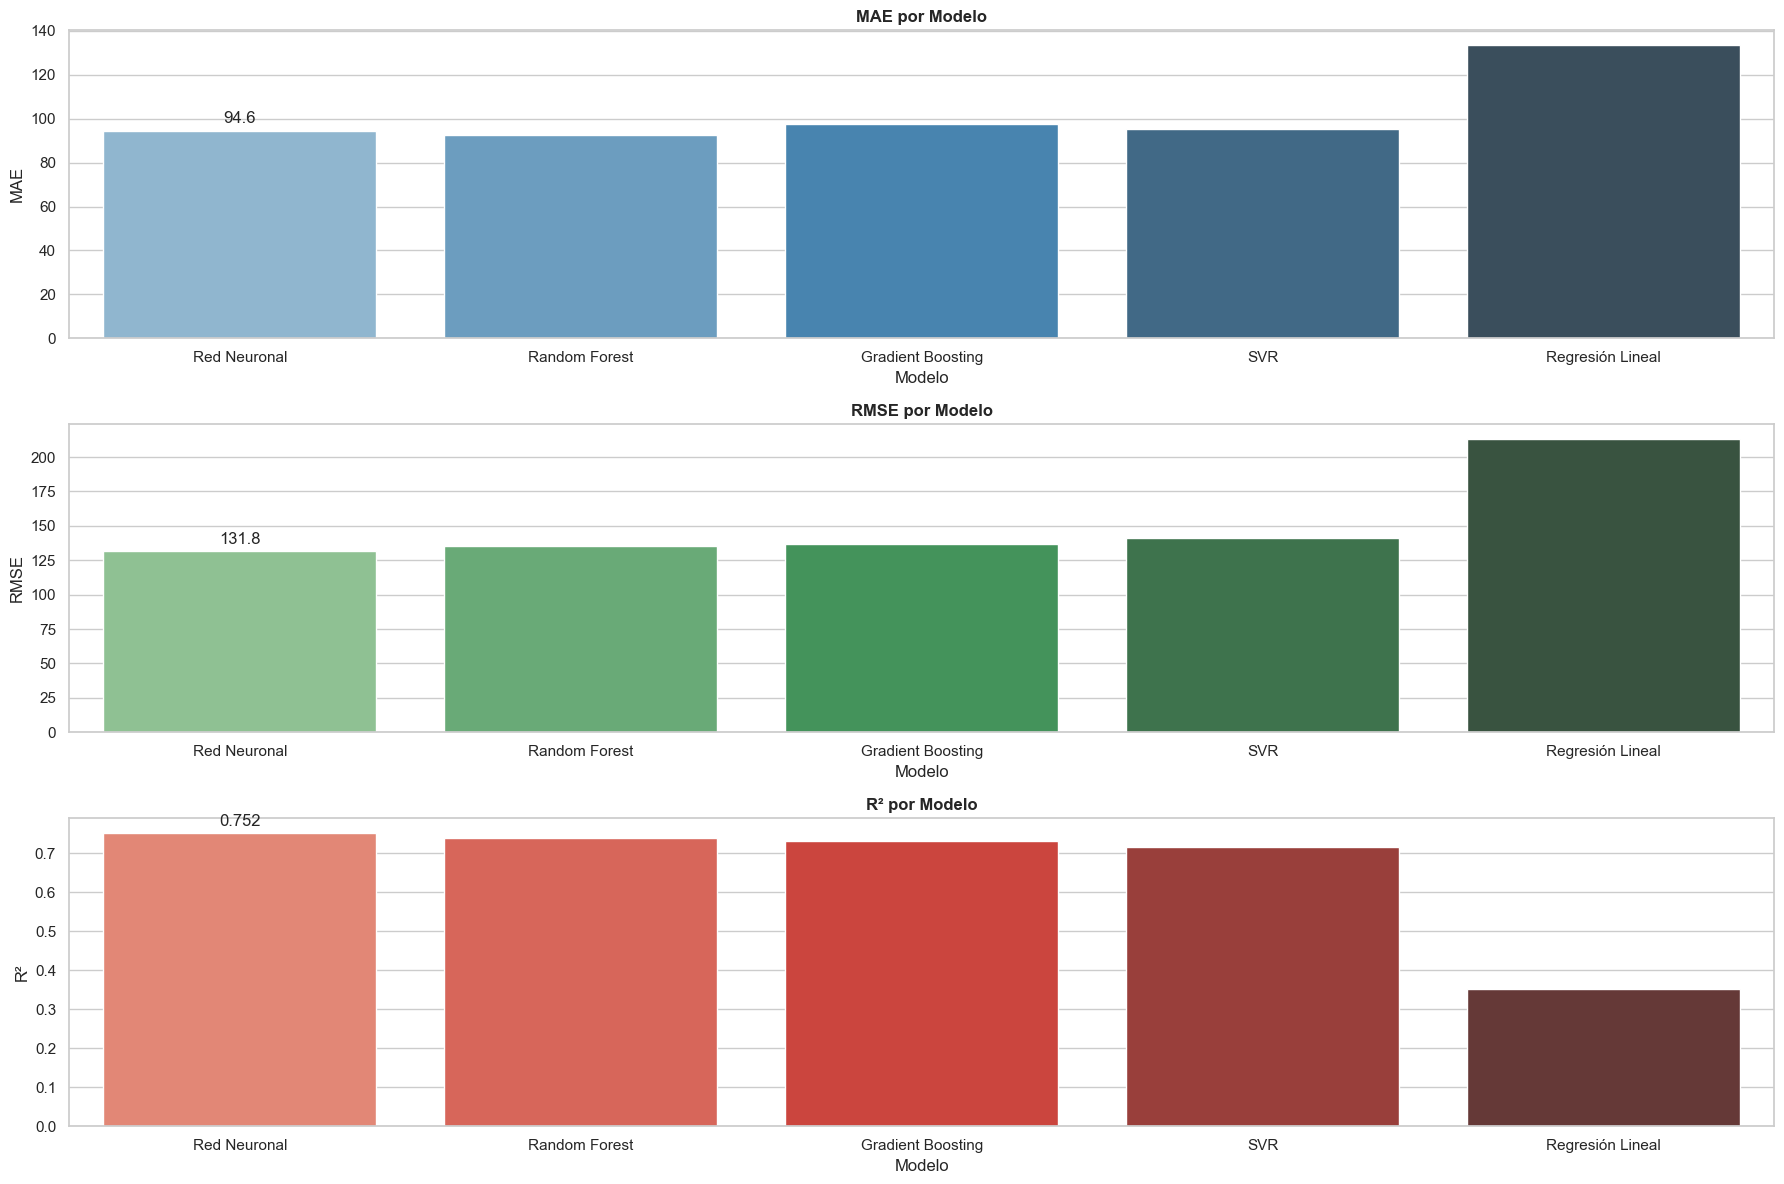

In [104]:

df = pd.DataFrame(resultados_2).sort_values(by="R²", ascending=False)  # Ordenar por R²

# Configuración del gráfico
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(18, 12))

# Gráfico de MAE
sns.barplot(ax=axes[0], x="Modelo", y="MAE", data=df, palette="Blues_d")
axes[0].set_title("MAE por Modelo", fontweight="bold")
axes[0].bar_label(axes[0].containers[0], fmt="%.1f", padding=3)

# Gráfico de RMSE
sns.barplot(ax=axes[1], x="Modelo", y="RMSE", data=df, palette="Greens_d")
axes[1].set_title("RMSE por Modelo", fontweight="bold")
axes[1].bar_label(axes[1].containers[0], fmt="%.1f", padding=3)

# Gráfico de R²
sns.barplot(ax=axes[2], x="Modelo", y="R²", data=df, palette="Reds_d")
axes[2].set_title("R² por Modelo", fontweight="bold")
axes[2].bar_label(axes[2].containers[0], fmt="%.3f", padding=3)

plt.tight_layout()



##### El mejor modelo según las métricas es MLPRegressor(Red Neuronal). Es el que tiene menor valor  RMSE y mayor R2. Este modelo es el que mejor generaliza los datos.

##### El Modelo (Mejor_modelo_9), MLPRegressor es el elegido para hacer las predicciones de las Ventas Diarias de Helados.
1. Error absoluto medio (MAE): 94.60, representa el error promedio en unidades de ventas. El modelo se equivoca con 94.60 ventas diarias.
2. Raíz del error cuadrático medio (RMSE): 131.82, penaliza más los errores grandes que el MAE. Las predicciones pueden desviarse en promedio 131.82 ventas de los valores reales.
3. Coeficiente de Determinación (R2): 0.75, indica qué proporción de la variabilidad de las ventas es explicada por el modelo. El modelo explica el 75% de la variabilidad de las ventas. Aunque es un valor aceptable, aún queda un 0.25% sin explicar, lo que indica que el modelo podría mejorarse.

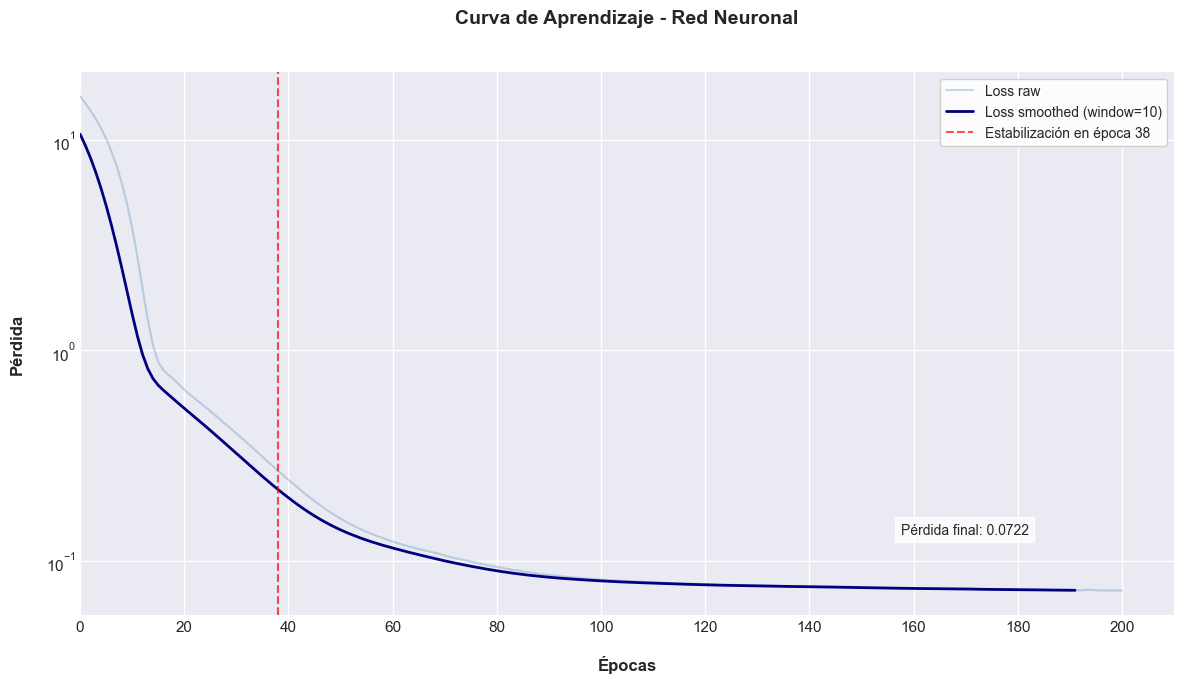

In [107]:
plt.figure(figsize=(12, 7))  # Tamaño ligeramente mayor para mejor espacio

# Añadir estilo profesional
plt.style.use('seaborn-v0_8-darkgrid')

# Trazar la curva de pérdida con suavizado opcional
window_size = 10  # Suavizado con media móvil de 10 épocas
smoothed_loss = np.convolve(mejor_modelo.loss_curve_, np.ones(window_size)/window_size, mode='valid')
plt.plot(mejor_modelo.loss_curve_, alpha=0.3, label='Loss raw', color='steelblue')  # Versión cruda transparente
plt.plot(smoothed_loss, label=f'Loss smoothed (window={window_size})', color='navy', linewidth=2)

# Detectar y marcar punto de estabilización (donde la pérdida cambia <1% durante 20 épocas)
tol = 0.01
for i in range(len(smoothed_loss)-20):
    if np.all(np.abs(np.diff(smoothed_loss[i:i+20])) < tol):
        plt.axvline(i, color='red', linestyle='--', alpha=0.7, 
                   label=f'Estabilización en época {i}')
        break

# Configuraciones avanzadas
plt.xlabel('Épocas', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Pérdida', fontsize=12, fontweight='bold', labelpad=15)
plt.title('Curva de Aprendizaje - Red Neuronal\n', 
         fontsize=14, fontweight='bold', pad=20)
plt.yscale('log') if max(mejor_modelo.loss_curve_) > 2*min(mejor_modelo.loss_curve_) else None  # Escala log opcional

# Leyenda personalizada
plt.legend(frameon=True, facecolor='white', framealpha=0.9, 
          loc='upper right', fontsize=10)

# Añadir texto informativo
plt.text(x=0.75, y=0.15, 
        s=f'Pérdida final: {mejor_modelo.loss_curve_[-1]:.4f}',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', alpha=0.8),
        fontsize=10)

# Ajustar límites y ticks
plt.xlim(left=0)
plt.xticks(np.arange(0, len(mejor_modelo.loss_curve_), len(mejor_modelo.loss_curve_)//10))
plt.tight_layout()

# Guardar en alta resolución (útil para publicaciones/informes)
plt.savefig('curva_aprendizaje.png', dpi=300, bbox_inches='tight')
plt.show()

##### Este gráfico muestra la evolución de la función de pérdida(loss) durante el entrenamiento de la Red Neuronal.
1. Descenso rápido inicial (0-25 épocas). la pérdida comienza en un valor alto(16) y cae drásticamente en las primera 25 iteraciones. Esto indica que el modelo está aprendiendo rápidamente en la fase inicial del entrenamiento.
2. Zona de estabilización (25-100 épocas). La pérdida sigue disminuyendo, pero de manera más lenta. Se está acercando a un mínimo asintótico, lo que sugiere que la red está afinando los pesos.
3. Convergencias(100 épocas en adelante). Después de 100 iteraciones, la curva se aplana casi completamente. Esto significa que el modelo ya no está mejorando significativamente, lo que indica convergencia.

### Conclusiones
1. El modelo ha aprendido bien y ha alcanzado una pérdida baja.
2. No hay signos de sobreajuste, ya que la pérdida sigue disminuyendo sin aumentar.


______________________________________________________________________________________

### Mejorar el ajuste del modelo

______________________________________________________________________________________

In [96]:
#Actualizar el conjunto de datos eliminando las variables irrelevantes (Estación_Año y Humedad_Relativa)

columnas_predictoras_nuevas = ['Temperatura_Media', 'Fin_de_semana_o_festivo', 'Radiación_Solar']

X_train_nuevo = X_train[columnas_predictoras_nuevas]
X_test_nuevo = X_test[columnas_predictoras_nuevas]

In [97]:
#Reescalar los datos
scaler_nuevo = StandardScaler()

#Ajustar y transformar los datos con las nuevas variables 
X_train_nuevo_scaled = scaler_nuevo.fit_transform(X_train_nuevo)
X_test_nuevo_scaled = scaler_nuevo.transform(X_test_nuevo)


In [98]:
# Entrenar nuevamente con las variables seleccionadas
grid_search_modelo_9.fit(X_train_nuevo_scaled, y_train_log)

# Obtener el mejor modelo
mejor_modelo_9 = grid_search_modelo_9.best_estimator_

# Hacer predicciones y evaluar
y_pred_9_log = mejor_modelo_9.predict(X_test_nuevo_scaled)
y_pred_9 = np.expm1(y_pred_9_log)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred_9)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_9))
r2 = r2_score(y_test, y_pred_9)

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
MAE: 97.8735, RMSE: 143.5179, R²: 0.7060


#### Después de ajustar el modelo han empeorado las métricas.